Saving gait_dataset.csv to gait_dataset.csv


/tmp/ipython-input-1562142107.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['step_length_m'].fillna(data['step_length_m'].mean(), inplace=True)


## Linear Regression Summary

**Mean Squared Error (MSE):** 0.0060

**R² Score:** 0.9070

**Model Coefficients:**

,Feature,Coefficient
0,age,-0.000431
1,weight,0.000423
2,step_length_m,1.525490
3,variability,-0.129639


**Intercept:** 0.0862

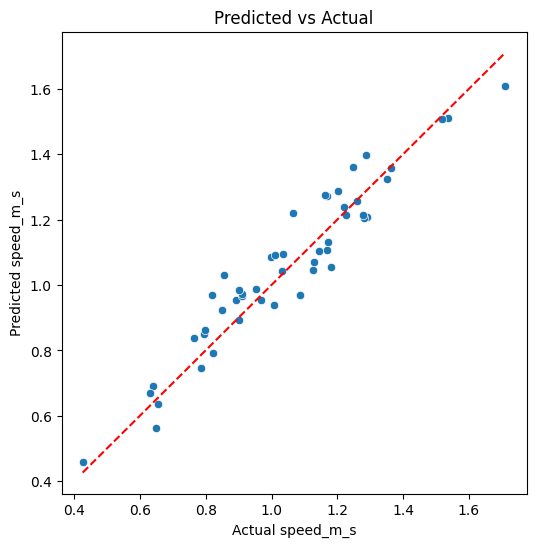

Points close to the red dashed line indicate good predictions. Outliers represent prediction errors.

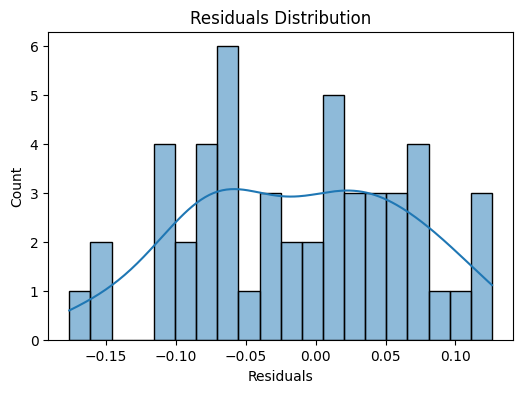

Residuals centered around 0 suggest no major bias and reasonable error distribution.

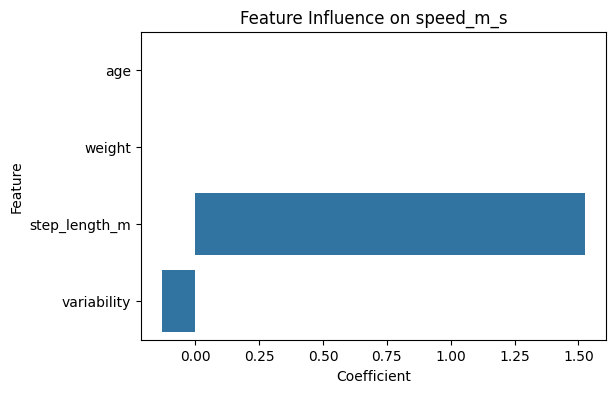

Larger magnitude coefficients indicate stronger influence on walking speed. Positive increases speed; negative decreases it.

In [ ]:
!pip install seaborn

from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))
data['step_length_m'].fillna(data['step_length_m'].mean(), inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

X = data[['age', 'weight', 'step_length_m', 'variability']]
y = data['speed_m_s']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lin_reg.coef_})
intercept = lin_reg.intercept_

display(Markdown("## Linear Regression Summary"))
display(Markdown(f"**Mean Squared Error (MSE):** {mse:.4f}"))
display(Markdown(f"**R² Score:** {r2:.4f}"))
display(Markdown("**Model Coefficients:**"))
display(coefficients)
display(Markdown(f"**Intercept:** {intercept:.4f}"))

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual speed_m_s")
plt.ylabel("Predicted speed_m_s")
plt.title("Predicted vs Actual")
plt.show()
display(Markdown("Points close to the red dashed line indicate good predictions. Outliers represent prediction errors."))

residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()
display(Markdown("Residuals centered around 0 suggest no major bias and reasonable error distribution."))

plt.figure(figsize=(6,4))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, orient='h')
plt.title("Feature Influence on speed_m_s")
plt.show()
display(Markdown("Larger magnitude coefficients indicate stronger influence on walking speed. Positive increases speed; negative decreases it."))


Saving gait_dataset.csv to gait_dataset (1).csv


/tmp/ipython-input-3670195460.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['step_length_m'].fillna(data['step_length_m'].mean(), inplace=True)


## Logistic Regression Summary

**Accuracy:** 0.6400

**Classification Report:**

,precision,recall,f1-score,support
normal,0.523810,0.578947,0.550,19.00
risky,0.724138,0.677419,0.700,31.00
accuracy,0.640000,0.640000,0.640,0.64
macro avg,0.623974,0.628183,0.625,50.00
weighted avg,0.648013,0.640000,0.643,50.00


**Model Coefficients:**

,Feature,Coefficient
0,age,0.031957
1,weight,-0.010565
2,speed_m_s,-2.114094
3,step_length_m,-1.174822
4,variability,0.551514


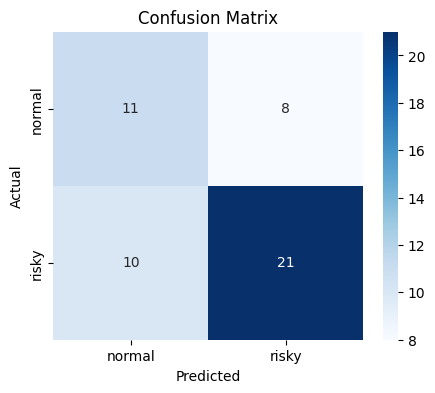

Diagonal values are correct predictions; off-diagonal values are misclassifications.

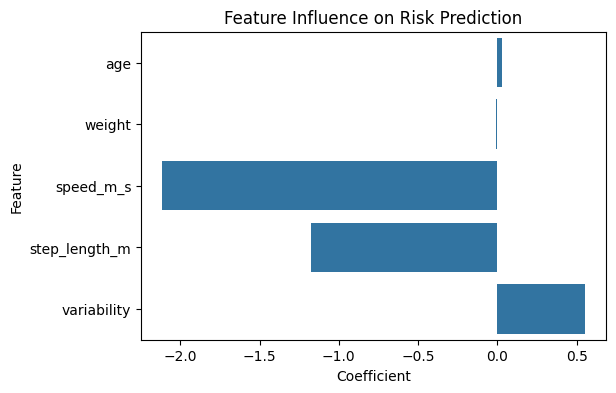

Positive coefficients increase likelihood of 'risky', negative coefficients increase likelihood of 'normal'.

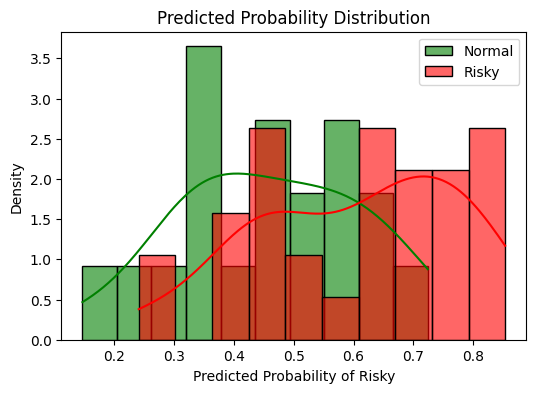

This plot shows the predicted probability of being 'risky'. Green peaks correspond to normal samples, red peaks to risky samples. The better separated the peaks, the more confident the model.

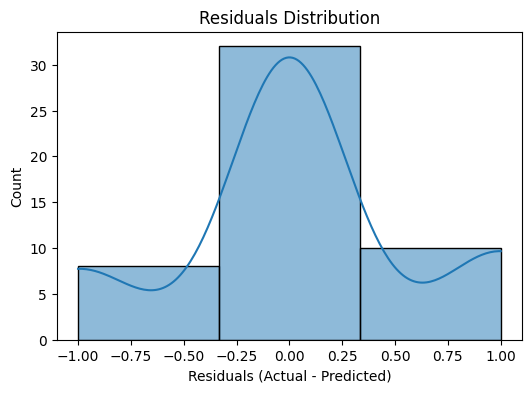

Residuals of 0 mean correct predictions. Non-zero residuals indicate misclassifications.

In [ ]:
!pip install seaborn

from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))
data['step_length_m'].fillna(data['step_length_m'].mean(), inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
import numpy as np

X = data[['age', 'weight', 'speed_m_s', 'step_length_m', 'variability']]
y = LabelEncoder().fit_transform(data['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["normal","risky"], output_dict=True)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})

display(Markdown("## Logistic Regression Summary"))
display(Markdown(f"**Accuracy:** {acc:.4f}"))
display(Markdown("**Classification Report:**"))
display(pd.DataFrame(report).transpose())
display(Markdown("**Model Coefficients:**"))
display(coefficients)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["normal","risky"], yticklabels=["normal","risky"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
display(Markdown("Diagonal values are correct predictions; off-diagonal values are misclassifications."))

plt.figure(figsize=(6,4))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, orient='h')
plt.title("Feature Influence on Risk Prediction")
plt.show()
display(Markdown("Positive coefficients increase likelihood of 'risky', negative coefficients increase likelihood of 'normal'."))

plt.figure(figsize=(6,4))
sns.histplot(y_prob[y_test==0], color='green', label='Normal', kde=True, stat="density", bins=10, alpha=0.6)
sns.histplot(y_prob[y_test==1], color='red', label='Risky', kde=True, stat="density", bins=10, alpha=0.6)
plt.xlabel("Predicted Probability of Risky")
plt.ylabel("Density")
plt.title("Predicted Probability Distribution")
plt.legend()
plt.show()
display(Markdown("This plot shows the predicted probability of being 'risky'. Green peaks correspond to normal samples, red peaks to risky samples. The better separated the peaks, the more confident the model."))

plt.figure(figsize=(6,4))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=3)
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residuals Distribution")
plt.show()
display(Markdown("Residuals of 0 mean correct predictions. Non-zero residuals indicate misclassifications."))
